Write a program using Python Keras, MatLab, or any programming language of
your choice to classify images into 3 classes (setosa, versicolor, virginica) using
any pre-trained CNN listed on slide 7 to 9 (of the Xfer Learning slides). You can
make any change to the pre-trained CNN, including no change at all.

In [1]:
from keras.applications import VGG16
vgg_conv = VGG16(weights="imagenet", input_shape=(224,224,3))
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
vgg_conv._layers.pop() #predictions layer
vgg_conv._layers.pop() #FC2 layer
vgg_conv._layers.pop() #FC1 layer
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [41]:
#add new FC layers
from keras.layers import Flatten, Dense
from keras.models import Model

#last = vgg_conv.output   # pop wasnt working, common issue according to internet
last = (vgg_conv.layers[-1].output) #remove layers this way
x=Dense(1024, activation='relu',name='New_Dense')(last)
v=Dense(512, activation='relu',name='New_Dense2')(x)
l=Dense(256, activation='relu',name='New_Dense3')(v)
m=Dense(16, activation='relu',name='New_Dense4')(l)
prediction_layer=Dense(3,activation='softmax',name='New_pred')(m)

model = Model(vgg_conv.input, prediction_layer)

#freeze layers
for layer in model.layers[:19]:
    layer.trainable = False
    
# Compile model
model.compile(optimizer = 'Adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Print the configurations of all the layers in the CNN
#summarize layers
model.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [42]:
#Load Training Images
from keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)
training_data = data.flow_from_directory('Iris_Imgs',target_size = (224, 224), batch_size = 10, 
                                         class_mode = 'categorical',shuffle=False, subset='training')
test_data = data.flow_from_directory('Iris_Imgs',target_size = (224, 224), batch_size = 45,
                                     class_mode = 'categorical',shuffle=False, subset='validation')



Found 105 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [43]:
# Train
model.fit_generator(training_data,steps_per_epoch=15,epochs=500,verbose=0)


In [44]:
#predict
predicted_score = model.predict_generator(test_data) #probabilities
predicted_label = predicted_score.argmax(axis=1)     #classes


In [45]:
import pandas as pd
import os
preds = pd.DataFrame(predicted_score, columns = test_data.class_indices.keys())
preds['filename'] = test_data.filenames
preds['actual'] = preds['filename'].apply(os.path.dirname)
preds['predicted'] = preds[list(test_data.class_indices.keys())].idxmax(1)
preds.head()

,setosa,versicolor,virginica,filename,actual,predicted
0,0.917187,0.001122,0.081691,setosa\Img_1.jpg,setosa,setosa
1,0.883198,0.001986,0.114816,setosa\Img_10.jpg,setosa,setosa
2,0.932280,0.001031,0.066688,setosa\Img_11.jpg,setosa,setosa
3,0.909286,0.001210,0.089504,setosa\Img_12.jpg,setosa,setosa
4,0.881244,0.002086,0.116670,setosa\Img_13.jpg,setosa,setosa


In [46]:
#Print the confusion matrix of your classification result, and what is the accuracy of classification result? 

from sklearn.metrics import confusion_matrix
## evaluate the model
scores = model.evaluate_generator(test_data)
print("\nTest data loss = %0.4f  accuracy = %0.2f%%" % (scores[0], scores[1]*100) )

print('\n Confusion Matrix \n',confusion_matrix(test_data.classes, predicted_label))


Test data loss = 2.7382  accuracy = 33.33%

 Confusion Matrix 
 [[15  0  0]
 [15  0  0]
 [15  0  0]]


In [47]:
print(test_data.classes)
print(predicted_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [48]:
#precision, recall, F-score for each class
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']
#classification_report(y_true, y_pred)
print(classification_report(test_data.classes,predicted_label, target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50        15
  versicolor       0.00      0.00      0.00        15
   virginica       0.00      0.00      0.00        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45



C:\Users\Jess\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jess\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jess\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


setosa AUC: 0.977778
versicolor AUC: 0.784444
virginica AUC: 0.993333
Overall AUC: 0.931852


C:\Users\Jess\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


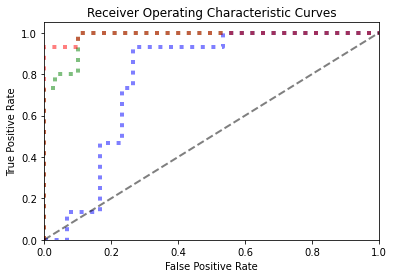

In [49]:
#Create a ROC Curve for each class

#Code from:  https://www.rkingdc.com/blog/machine-learning-on-a-real-problem-3
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score, auc
import numpy as np
from scipy import interp

def get_actual(df, class_label):
    y_actual = df['actual'] == class_label
    return y_actual.astype(int).values, df[class_label].values

n_classes = len(test_data.class_indices)
classes = test_data.class_indices.keys()
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()

for k,i in test_data.class_indices.items():
    t, p = get_actual(preds, k)
    fpr[i], tpr[i], _ = roc_curve(t, p)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# average it and compute AUC
mean_tpr /= n_classes

fpr["overall"] = all_fpr
tpr["overall"] = mean_tpr
roc_auc["overall"] = auc(fpr["overall"], tpr["overall"])


#Compute ROC curve and ROC area for each class
print_auc = (lambda x,v: print('{v} AUC: {x:.6f}'.format(v=v, x=x)))
for k,v in test_data.class_indices.items():
    print_auc(roc_auc[v], k)
print_auc(roc_auc['overall'], "Overall")


#Plot
import matplotlib.pyplot as plt
plt.plot(fpr[0], tpr[0], color='green', lw=4, ls="dotted", alpha=.5)
plt.plot(fpr[1], tpr[1], color='blue', lw=4,ls="dotted", alpha=.5)
plt.plot(fpr[2], tpr[2], color='red', lw=4,ls="dotted", alpha=.5)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()